# Clasificación Iris Dataset con ANN

En este notebook entrenaremos un red neuronal para establecer un modelo de clasificación de las especies de Iris.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importamos el dataset de ejemplo

In [2]:
from sklearn.datasets import load_iris

In [3]:
bunch = load_iris()

In [4]:
df = pd.DataFrame(bunch.data, columns=bunch.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

#### Formulamos el Modelo


In [7]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
y = bunch.target

#### Preprocesamiento de los datos

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)
y_dum = pd.get_dummies(y_enc).values

In [10]:
y_enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [11]:
y_dum

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

#### Validación cruzada

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y_dum, test_size=0.2, random_state=101)

#### Importación librerías ANN

In [12]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

#### Diseño arquitectura ANN

Cree una red con la siguiente arquitectura:
- Input vector (4 nodos) activacion 'tanh'
- Hidden Layer 1 (10 nodos) activacion 'tanh'
- Hidden Layer 2 (8 nodos) activacion 'tanh'
- Hidden Layer 3 (6 nodos) activacion 'softmax'

Utilice optimizador Adam con learning rate de 0.02

In [20]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(10,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(3,activation='softmax'))

In [22]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.03),metrics=['accuracy'])

#### Entrenamiento ANN

In [23]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.9660 - accuracy: 0.6833
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.8113 - accuracy: 0.7000
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 0.7491 - accuracy: 0.9333
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 0.6707 - accuracy: 0.8750
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6110 - accuracy: 0.8083
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 0.5521 - accuracy: 0.8750
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.4860 - accuracy: 0.9083
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.4229 - accuracy: 0.9000
Epoch 9/50
1/1 [==============================] - 0s 18ms/step - loss: 0.3714 - accuracy: 0.9500
Epoch 10/50
1/1 [==============================] - 0s 77ms/step - loss: 0.3329 - accuracy: 0.9667
Epoch 11/50
1/1 [=================

#### Predicciones con el modelo ANN

In [25]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 251ms/step


In [28]:
y_pred_clase = np.argmax(y_pred,axis=1)
y_test_clase = np.argmax(y_test,axis=1)

In [29]:
y_pred_clase

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0], dtype=int64)

#### Métricas de Evaluación

In [24]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test_clase,y_pred_clase)

1.0

### Graficar error error vs epochs (train y test)

Text(0, 0.5, 'loss')

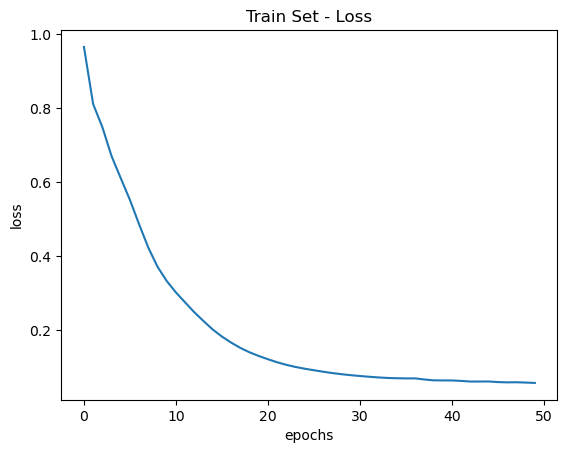

In [32]:
plt.title('Train Set - Loss')
plt.plot(history.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')